<a href="https://colab.research.google.com/github/MiguelAngeloTr/BIGDATA/blob/main/C1/Parcial1/Parcial_1_BIGDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Universidad Autónoma de Occidente

##Facultad de Ingenierías y Ciencias Básicas

##Curso: Big Data

##Autor: Sergio A. Cantillo

##Correo: sacantillo@uao.edu.co

---

### **NOMBRE COMPLETO:Miguel Angel Jimenez Trochez**

###**CODIGO:2215407**

### **PROGRAMA:Ingenieria Informatica**

---

### **Condiciones**

*   Pueden usar los archivos Google Colab trabajados en clase.
*   No pueden usar IA para buscar las respuetas del examen. Quien sea visto en flagrancia, el examen será **anulado**.
*   Se contestan las preguntas 1, 2 y 3 Obligatoriamente, del resto se escogen 2 para hacer 5. Si contestan todas las 6 preguntas correctamente bonifican para el segundo parcial.
*   Pueden usar el material de referencia de UAO virtual
*   Subir el archivo con extensión .ipynb a la plataforma antes de las 12:59 PM.


# **Examen 1**

El conjunto de datos AB_NYC_2019.csv contiene información acerca de los listados de Airbnb en la ciudad de Nueva York. Incluye variables como el nombre del alojamiento, el nombre del anfitrión, la ubicación geográfica (vecindario y coordenadas), el tipo de habitación, el precio por noche, el número mínimo de noches requeridas para una reserva, la disponibilidad durante el año, entre otros detalles relevantes. El objetivo en este análisis de datos consiste en utilizar las herramientas computacionales y estadísticas vistas hasta el momento en el curso que logren contribuir a la caracterización de estos alojamientos



In [28]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3.tgz
!tar xf spark-3.5.5-bin-hadoop3.tgz
!pip install pyspark
!pip install py4j
!pip install findspark

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
33 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [29]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.5-bin-hadoop3"

In [30]:
import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Parcial 1 Spark") \
       .getOrCreate()

Comprobar sesión

In [31]:
spark

In [32]:
from pyspark.sql.types import *
from pyspark.sql.functions import to_date
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import col, regexp_extract, avg, split

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
#cargar dataset

import requests
path = "https://raw.githubusercontent.com/MiguelAngeloTr/BIGDATA/refs/heads/main/C1/Parcial1/AB_NYC_2019.csv"
req = requests.get(path)
url_content = req.content

csv_file_name = 'AB_NYC_2019.csv'
csv_file = open(csv_file_name, 'wb')

csv_file.write(url_content)
csv_file.close()





In [45]:
schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("name", StringType(), True),
    StructField("host_id", IntegerType(), True),
    StructField("host_name", StringType(), True),
    StructField("neighbourhood_group", StringType(), True),
    StructField("neighbourhood", StringType(), True),
    StructField("latitude", DoubleType(), True),
    StructField("longitude", DoubleType(), True),
    StructField("room_type", StringType(), True),
    StructField("price", IntegerType(), True),
    StructField("minimum_nights", IntegerType(), True),
    StructField("number_of_reviews", IntegerType(), True),
    StructField("last_review", StringType(), True),
    StructField("reviews_per_month", DoubleType(), True),
    StructField("calculated_host_listings_count", IntegerType(), True),
    StructField("availability_365", IntegerType(), True)
])

In [46]:
df = spark.read.csv('/content/'+csv_file_name, header=True, inferSchema=True, multiLine=True,schema=schema)
df.show()

+----+--------------------+-------+----------------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|  id|                name|host_id|       host_name|neighbourhood_group|     neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|
+----+--------------------+-------+----------------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|2539|Clean & quiet apt...|   2787|            John|           Brooklyn|        Kensington|40.64749|-73.97237|   Private room|  149|             1|                9| 2018-10-19|             0.21|                             6|             365|
|2595|Skylit Midtown Ca.

In [47]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)



Manejo de faltantes

In [48]:
def faltantes(df):
  falta = df.select([F.sum(F.col(c).isNull().cast('int')).alias(c) for c in df.columns])
  return falta.show()

## **1.**   A partir de la carga del conjunto de datos crudo, realice los procesos de adecuación (Ej. tipos de dato) y limpieza de (Ej. identificación y eliminación de columnas) requeridos.

##Responda:

## 1.1 ¿Cual es el tamaño (filas,columnas) del conjunto de datos crudo?, y luego de los procesos solicitados?

## 1.2 Indique brevemente si fueron eliminadas columnas de la base de datos y el criterio correspondiente.

---

**1.1: Respuesta**

In [49]:
print('Tamaño (filas, columnas) del conjunto de datos crudo: ', (df.count(), len(df.columns)))

Tamaño (filas, columnas) del conjunto de datos crudo:  (48895, 16)


1.2 Eliminación de columnas y filas con datos faltantes

In [70]:
df2= df.drop('id','host_id', 'last_review', 'reviews_per_month')
print('Se eliminan id, host id, last_review, reviews_per_month  por que no aportan al analisis de los datos ')
df2.show()

print('Tamaño (filas, columnas) del conjunto de datos crudo: ', (df2.count(), len(df2.columns)))



Se eliminan id, host id, last_review, reviews_per_month  por que no aportan al analisis de los datos 
+--------------------+----------------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+------------------------------+----------------+
|                name|       host_name|neighbourhood_group|     neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|calculated_host_listings_count|availability_365|
+--------------------+----------------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+------------------------------+----------------+
|Clean & quiet apt...|            John|           Brooklyn|        Kensington|40.64749|-73.97237|   Private room|  149|             1|                9|                             6|             365|
|Skylit Midtown Ca...|        Jennifer|          Manhattan|           Midtown|40.75362|-73.983

In [71]:
faltantes(df2)

+----+---------+-------------------+-------------+--------+---------+---------+-----+--------------+-----------------+------------------------------+----------------+
|name|host_name|neighbourhood_group|neighbourhood|latitude|longitude|room_type|price|minimum_nights|number_of_reviews|calculated_host_listings_count|availability_365|
+----+---------+-------------------+-------------+--------+---------+---------+-----+--------------+-----------------+------------------------------+----------------+
|  16|       21|                  0|            0|       6|        1|        0|    6|             2|                1|                             5|               1|
+----+---------+-------------------+-------------+--------+---------+---------+-----+--------------+-----------------+------------------------------+----------------+



In [75]:
df2 = df2.na.drop()
faltantes(df2)
print('Tamaño (filas, columnas) del conjunto de datos sin faltantes: ', (df2.count(), len(df2.columns)))

+----+---------+-------------------+-------------+--------+---------+---------+-----+--------------+-----------------+------------------------------+----------------+
|name|host_name|neighbourhood_group|neighbourhood|latitude|longitude|room_type|price|minimum_nights|number_of_reviews|calculated_host_listings_count|availability_365|
+----+---------+-------------------+-------------+--------+---------+---------+-----+--------------+-----------------+------------------------------+----------------+
|   0|        0|                  0|            0|       0|        0|        0|    0|             0|                0|                             0|               0|
+----+---------+-------------------+-------------+--------+---------+---------+-----+--------------+-----------------+------------------------------+----------------+

Tamaño (filas, columnas) del conjunto de datos sin faltantes:  (48852, 12)


## **2.** A partir de la variable precio del alojamiento (price), obtenga los coeficientes de asimetria y forma, ademas grafíquela a través de un histograma y un diagrama de cajas.

## Responda:

## 2.1 De acuerdo a los coeficientes de asimetria y forma, ¿Qué clasificación presenta esta variable? ¿Corresponde a una distribución normal convencional?

---



2.1 Coeficientes de asimetria y forma

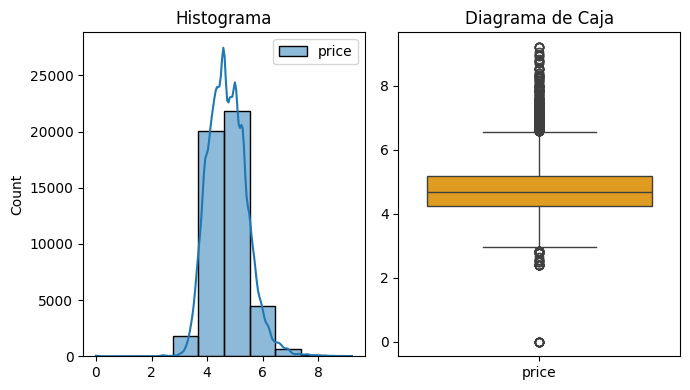


 La kurtosis nos muestra que la distribución de la forma es leptocurtica y tiene una asimetria con sesgo positivo 
+-----------------+----------------+
|  skewness(price)| kurtosis(price)|
+-----------------+----------------+
|19.11735786784322|585.549049095065|
+-----------------+----------------+



In [91]:
df_Price = np.log1p(df2.select('price').toPandas())
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_Price, kde=True, bins=10, color='blue')
plt.title('Histograma')
plt.subplot(1, 2, 2)

sns.boxplot(df_Price, color='orange')
plt.title('Diagrama de Caja')
plt.tight_layout()
plt.show()

print('\n La kurtosis nos muestra que la distribución de la forma es leptocurtica y tiene una asimetria con sesgo positivo ' )
df.select(F.skewness('price'),F.kurtosis('price')).show()

## **3.**   Realice una tabla donde se determine la distribución de los tipos de alojamiento disponibles (room_type) por vecindario (neighborhood_group), incluyendo el precio promedio para cada uno. Asimismo, Grafique esta distribución con un diagrama de barras donde el eje X sean los vecindarios, el eje Y las cantidades. Ademas que existan barras por cada tipo de alojamiento.

## Responda:

## 3.1 ¿Qué se puede decir acerca de la relación entre el precio y tipo de alojamiento respecto del vecindario donde estan ubicados?

## 3.2 ¿Qué vecindarios presentan la mayor cantidad de alojamientos tipo Private room?

## 3.3 ¿Qué se puede decir de la distribución de los alojamientos en manhattan con respecto a los demas vecindarios?

---



3.1

In [131]:
import pyspark.sql.window as W

res = df2.groupBy('neighbourhood_group','room_type').agg(F.avg('price').alias('avg_price')).orderBy('neighbourhood_group', 'room_type')
window= W.Window.partitionBy('neighbourhood_group').orderBy('room_type')
result = res.withColumn("row", F.row_number().over(window)) \
               .withColumn("neighbourhood_group", F.when(F.col("row") == 1, F.col("neighbourhood_group")).otherwise(F.lit(""))) \
               .drop("row")
result.show()


+-------------------+---------------+------------------+
|neighbourhood_group|      room_type|         avg_price|
+-------------------+---------------+------------------+
|              Bronx|Entire home/apt|127.64550264550265|
|                   |   Private room| 66.78834355828221|
|                   |    Shared room|58.610169491525426|
|           Brooklyn|Entire home/apt|178.37535336613968|
|                   |   Private room| 76.51061938160625|
|                   |    Shared room| 50.52784503631961|
|          Manhattan|Entire home/apt|249.24383956327242|
|                   |   Private room|116.82409033877039|
|                   |    Shared room| 88.97708333333334|
|             Queens|Entire home/apt|147.05057251908397|
|                   |   Private room| 71.77685459940653|
|                   |    Shared room| 69.02020202020202|
|      Staten Island|Entire home/apt| 173.8465909090909|
|                   |   Private room| 62.29255319148936|
|                   |    Shared

<Axes: xlabel='neighbourhood_group', ylabel='count'>

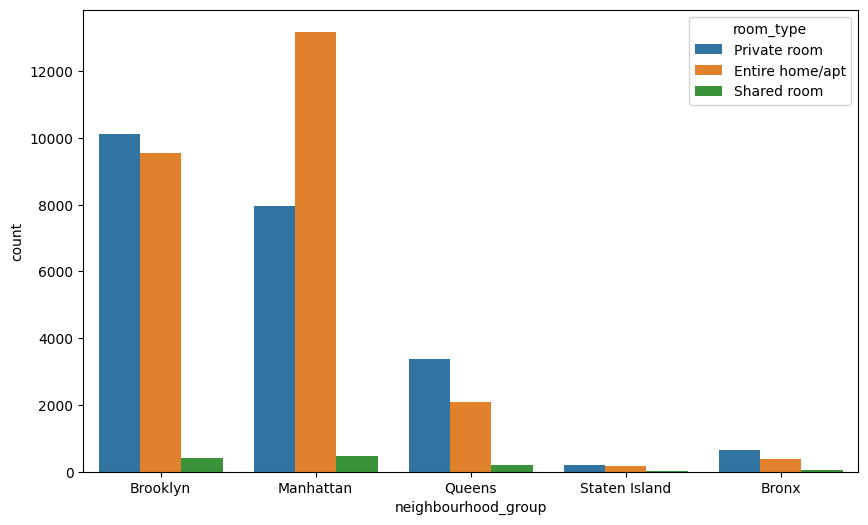

In [137]:
 df_class_fare = df2.select('neighbourhood_group','room_type','price').toPandas()
 plt.figure(figsize=(10, 6))
 sns.countplot(x='neighbourhood_group', hue='room_type', data=df_class_fare)





*  3.2: Los vecindarios que presentan mayor cantidad de alojamientos tipo private_room estan ubicados en brooklyn
*   3.3 Manhattan tiene la mayor cantidad de alojamientos tipo Entire home/apt



## **4.**   Realice una tabla donde se determine por vecindario (neighbourhood_group) la cantidad de alojamientos totales, su equivalente porcentual y su disponibilidad promedio (availability_365). Ordene los resultados de acuerdo al porcentaje (mayor a menor)

## Responda:

## 4.1. Teniendo en cuenta la información de esta tabla, ¿En cuál vecindario seria más probable encontrar alojamiento disponible?

## 4.2 ¿Qué se puede decir acerca de la relación de los alojamientos totales y la disponibilidad promedio en los vecindarios?

---




In [154]:
df2.printSchema()

root
 |-- name: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)
 |-- availability level: string (nullable = true)



In [150]:
window = W.Window.rowsBetween(W.Window.unboundedPreceding,W.Window.unboundedFollowing)
tab = df2.select(['neighbourhood_group','availability_365']). \
          groupBy('neighbourhood_group'). \
          agg(F.count('availability_365').alias('Quantity'),
              F.mean('availability_365').alias('availability_mean')). \
          withColumn('Total',F.sum(F.col('Quantity')).over(window)). \
          withColumn('Percent',F.col('Quantity')*100/F.col('Total')). \
          drop(F.col('Total')).orderBy("Percent", ascending=False)
tab.show()

+-------------------+--------+------------------+------------------+
|neighbourhood_group|Quantity| availability_mean|           Percent|
+-------------------+--------+------------------+------------------+
|          Manhattan|   21639|112.01506539119183| 44.29501351019405|
|           Brooklyn|   20087| 100.2368198337233|  41.1180709080488|
|             Queens|    5664|144.48728813559322|11.594202898550725|
|              Bronx|    1089|165.70431588613405|2.2291820191599117|
|      Staten Island|     373|199.67828418230562|0.7635306640465078|
+-------------------+--------+------------------+------------------+



4.1 El vecindario que es mas probable de encontrar alojamiento disponible es Staten Island debido a que su porcentaje promedio es de 199%, pero teniendo en cuenta que las demas regiones tienen una mayor cantidad de personas, el que tienen un mayor porcentaje de disponibilidad es Manhattan con un 44 %

4.2 Se puede decir que la relacion entre los alojamientos totales y la disponibilidad promedio en los vecindarios es que entre mayor cantidad de alojamientos mayor porcentaje de disponibilidad

## **5.** Construya una matriz de correlación considerando el precio, la disponibilidad, y el numero de noches minimo de alojamiento.
## Responda:
## 5.1 ¿Cómo afecta la disponibilidad y minimum_nights al precio de los alojamientos en Airbnb NYC?

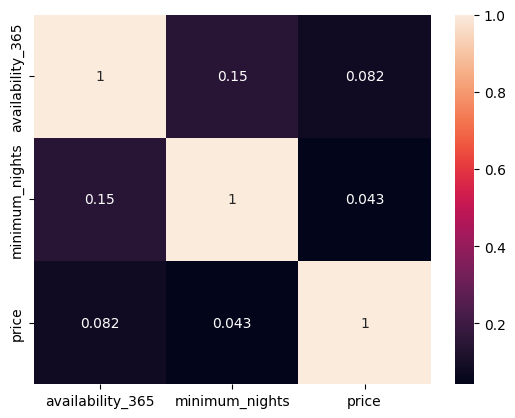

In [93]:
df_full = df2.select('availability_365','minimum_nights','price').toPandas()
sns.heatmap(df_full.corr(), annot=True)
plt.show()

5.1 El precio y la disponibilidad estan altamente correlacionados esto puede significar  , mientras el precio y el minimo de noches estan relativamente correlacionados

## **6.** A partir de la variable availability_365, realice una recodificación las siguientes condiciones y añadala a dataframe con el nombre de "availability level":

* Low disp: 0 a 119 días
* Med disp: 120 a 240 días
* High disp: 241 a 360 días

## 6.1 A partir de este nuevo dataframe, entregue una tabla donde por este nivel de disponibilidad se muestre el total de alojamientos. ¿Que se puede decir acerca de esta información?

In [174]:
def NivelDisponibilidad(x):
  if x <= 119 & x >= 0:
    return 'Low disp'
  elif x <= 240 & x >= 120:
    return 'Med disp'
  elif x <= 360 & x >= 241:
    return 'High disp'






In [178]:
dis_udf= F.udf(lambda x: NivelDisponibilidad(x), StringType())
df2= df2.withColumn("level_availability", dis_udf(df2["availability_365"]))

PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "<ipython-input-152-fd109d199655>", line 1, in <lambda>
NameError: name 'NivelDisponibilidad' is not defined
